# Assignment goals

The objective of this challenge is to assess you ability to:

● perform basic data manipulation and data pre-processing

● demonstrate awareness of the computations involved

● perform feature engineering

● train and tune ML models

● asses performance of the ML models

● obtaining clear, useful, and business driven insights from data and models

In [107]:
#Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
import pymysql
import pandas_profiling
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import tree

# Loading and examining data


In [2]:
# Reading data

scores_df = pd.read_csv('../data/genome_scores.csv')
tags_df = pd.read_csv('../data/genome_tags.csv')
link_df = pd.read_csv('../data/link.csv')
movie_df = pd.read_csv('../data/movie.csv')
rating_df = pd.read_csv('../data/rating.csv')
tag_df = pd.read_csv('../data/tag.csv')

In [3]:
scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [4]:
# Checking nulls

scores_df.isna().sum() / len(scores_df)

movieId      0.0
tagId        0.0
relevance    0.0
dtype: float64

In [115]:
# Checking duplicates

scores_df.duplicated().sum() / len(scores_df)

0.0

In [5]:
tags_df.head(10)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [6]:
# Checking nulls

tags_df.isna().sum() / len(tags_df)

tagId    0.0
tag      0.0
dtype: float64

In [116]:
# Checking duplicates

tags_df.duplicated().sum() / len(tags_df)

0.0

In [7]:
link_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
# Checking nulls

link_df.isna().sum() / len(link_df)

movieId    0.000000
imdbId     0.000000
tmdbId     0.009238
dtype: float64

In [9]:
movie_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [10]:
# Checking nulls

movie_df.isna().sum() / len(movie_df)

movieId    0.0
title      0.0
genres     0.0
dtype: float64

In [117]:
# Checking duplicates

movie_df.duplicated().sum() / len(movie_df)

0.0

In [11]:
tag_df.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
5,65,668,bollywood,2013-05-10 01:37:56
6,65,898,screwball comedy,2013-05-10 01:42:40
7,65,1248,noir thriller,2013-05-10 01:39:43
8,65,1391,mars,2013-05-10 01:40:55
9,65,1617,neo-noir,2013-05-10 01:43:37


In [12]:
# Checking nulls

tag_df.isna().sum() / len(tag_df)

userId       0.000000
movieId      0.000000
tag          0.000034
timestamp    0.000000
dtype: float64

In [13]:
# Checking nulls

tag_df[tag_df.tag.isna()==True]

,userId,movieId,tag,timestamp
373276,116460,123,NaN,2008-01-04 12:47:47
373277,116460,346,NaN,2008-01-04 13:05:46
373281,116460,1184,NaN,2008-01-04 13:11:01
373288,116460,1785,NaN,2008-01-04 13:06:46
373289,116460,2194,NaN,2008-01-04 12:44:37
373291,116460,2691,NaN,2008-01-04 12:50:02
373299,116460,4103,NaN,2008-01-04 13:05:20
373301,116460,4473,NaN,2008-01-04 12:50:40
373303,116460,4616,NaN,2008-01-04 13:14:01
373319,116460,7624,NaN,2008-01-04 13:11:06


In [14]:
# Dropping nulls

tag_df = tag_df.dropna()

In [118]:
# Checking duplicates

tag_df.duplicated().sum() / len(tag_df)

0.0

In [15]:
rating_df.head(50)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [16]:
# Checking nulls

rating_df.isna().sum() / len(rating_df)

userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64

In [119]:
# Checking duplicates

rating_df.duplicated().sum() / len(rating_df)

0.0

# Modeling structure

Create a dataframe where each instance (row) corresponds to a rating of some movie made by some user at a given point in time.

Note in particular that if a user has several ratings, then each of her ratings must appear on a different row.

Each column will correspond to a predictive variable (below we give instructions on the predictive variables). 

Then, create a column with the response variable for your model. This response variable is defined as:

● 1 in case the rating is >= 4 (flag for "high" rating)

● 0 in case the rating is < 4

In [17]:
# Creating a copy of the users' ratings dataframe 
df = rating_df.copy()

In [18]:
# Creating target variable: ratings equal or higher than 4 will be assigned 1, else will be 0.

def rating_encoder(rating):
    if rating >= 4: 
        return 1
    else: 
        return 0

df['high_rating'] = df.rating.apply(rating_encoder)

In [19]:
# Checking dataset's balance between high and lower rating movies

df.high_rating.value_counts() / len(df)

0    0.500236
1    0.499764
Name: high_rating, dtype: float64

In [20]:
# Splitting dataframes based on date, to avoid data leakage

# Ordering dataframe by date

df = df.sort_values(by=['timestamp'])

df


,userId,movieId,rating,timestamp,high_rating
4182421,28507,1176,4.0,1995-01-09 11:46:44,1
18950979,131160,1079,3.0,1995-01-09 11:46:49,0
18950936,131160,47,5.0,1995-01-09 11:46:49,1
18950930,131160,21,3.0,1995-01-09 11:46:49,0
12341178,85252,45,3.0,1996-01-29 00:00:00,0
...,...,...,...,...,...
7819902,53930,118706,3.5,2015-03-31 06:00:51,0
2508834,16978,2093,3.5,2015-03-31 06:03:17,0
12898546,89081,55232,3.5,2015-03-31 06:11:26,0
12898527,89081,52458,4.0,2015-03-31 06:11:28,1


In [21]:
# Reseting index
df = df.reset_index()

In [22]:
# Checking 70% split
df[df.index== int(0.7*len(df))]

,index,userId,movieId,rating,timestamp,high_rating
14000184,6633261,45669,6016,2.5,2007-12-08 01:20:38,0


In [23]:
# Storing timestamp that will separate train and test information

timestamp_limit = df[df.index== int(0.7*len(df))]['timestamp'].values[0]

# To avoid data leakage, data after this timestamp cannot be used for prediction

In [24]:
# Splitting dataframe on train (70%) and test set (30%)

df_train, df_test= np.split(df, [int(.7 *len(df))])

In [25]:
# Reviewing train set
df_train

,index,userId,movieId,rating,timestamp,high_rating
0,4182421,28507,1176,4.0,1995-01-09 11:46:44,1
1,18950979,131160,1079,3.0,1995-01-09 11:46:49,0
2,18950936,131160,47,5.0,1995-01-09 11:46:49,1
3,18950930,131160,21,3.0,1995-01-09 11:46:49,0
4,12341178,85252,45,3.0,1996-01-29 00:00:00,0
...,...,...,...,...,...,...
14000179,6633146,45669,4017,3.5,2007-12-08 01:19:14,0
14000180,6632828,45669,1241,4.5,2007-12-08 01:19:28,1
14000181,6633185,45669,4641,3.5,2007-12-08 01:19:55,0
14000182,6633284,45669,6620,4.0,2007-12-08 01:20:05,1


In [26]:
# Reviewing test set
df_test

,index,userId,movieId,rating,timestamp,high_rating
14000184,6633261,45669,6016,2.5,2007-12-08 01:20:38,0
14000185,6633348,45669,7942,3.0,2007-12-08 01:21:04,0
14000186,6633515,45669,46723,3.0,2007-12-08 01:21:26,0
14000187,6632788,45669,923,3.5,2007-12-08 01:21:47,0
14000188,6633042,45669,2918,5.0,2007-12-08 01:22:00,1
...,...,...,...,...,...,...
20000258,7819902,53930,118706,3.5,2015-03-31 06:00:51,0
20000259,2508834,16978,2093,3.5,2015-03-31 06:03:17,0
20000260,12898546,89081,55232,3.5,2015-03-31 06:11:26,0
20000261,12898527,89081,52458,4.0,2015-03-31 06:11:28,1


In [27]:
# Storing train and test set leghts for testing purposes
orifinal_len_train = len(df_train)
orifinal_len_test = len(df_test)

# Feature engineering

This is the part of the challenge where we will focus the most on our evaluation. Implement a
series of features that you think will have a high predictive power. Be creative, and explore
all the ideas you might have on what information could be useful to predict the rating of a
client.

Important Note: When creating the features that you propose, that predict the rating that a
user will give to some movie:

● assume that this model will be used to generate online predictions on a production
setting, and be aware of the implications of that, and

● put special attention for data leakage.

Your code organization and good practices will be taken into consideration, make sure that
your final submission is understandable, cleant, and the logic is easy to follow by other
people. Also, it is advisable to have considerations for code efficiency.

## Notes on feature engineering

**My efforts to avoid data leakage:**

Data Leakage is the introduction of a feature, that at the time of prediction is not available. It often contains the information about the target we are trying to predict. Therefore, data leakage can imply that a machine learning model has a great performance and is suitable for production, when it has "cheated" by learning patterns on some information that will not be available at the time of predicting in production. Hence, the performance metrics would be misleading.

To avoid data leakage, I was very careful when splitting the train and test set, first ordering the data by timestamp. Then, I divided the dataset into train (70% of the data) and test (30% of the data) sets. I stored the time stamp when the split was made. For feature engineering, I will only use information that was available prior to that time stamp. Hence, all the features used for prediction will only have information that would be available at the time of prediction. In other words, only info that was created before the timestamp of the first rating of the test set will be used for feature engineering and prediction.



**Features I will be adding:**

- Movie's average rating ("movie_avg_rating"): Average rating per movie. To avoid data leakage, it is computed only on the train set. Thus, the test set will only have information that was already available when the ratings from the test set were made. I will add this feature to the model because movies that got higher ratings in the past may have higher ratings in the future.


- Movie's ratings count ("movie_ratings_count"): Rating's amount per movie. In other words, how many reviews the movie had. To avoid data leakage, it is computed only on the train set. Thus, the test set will only have information that was already available when the ratings from the test set were made. I will add this feature to the model since movies that have been rated more times are probably more popular and this might affect how they are rated. Movies could become more popular due to different reasons, one of them being the fact that people liked it. Following this reasoning, movies with more ratings could be more likeable and receive higher ratings.     


- Genre's average rating ("genre_avg_rating"): Average rating per genre. To avoid data leakage, it is computed only on the train set. Thus, the test set will only have information that was already available when the ratings from the test set were made. I will add this feature to the model since I believe that movies that belong to a gender that got higher ratings in the past may have higher ratings in the future.


- Movie's Number of genres ("n_of_genres"): Number of genres per movie. Movies can belong to more than one gender ("Adventure|Children|Fantasy" for example). This variable will count the number of genres a movie belongs to. I'll compute this feature using the entire movie dataset since there is no risk of data leakage. This information was available when the ratings from the test set were made. I will add this feature to the model since I believe that movies that belong to more genres can be appealing to more people, increasing the chances that the movie receives a higher rating. 


- Movie's Release year ("release_year"): Year when the movie was released. I'll compute this feature using the entire movie dataset since there is no risk of data leakage. This information was available when the ratings from the test set were made. I will add this feature to the model because people might rate differently older movies (classics) than more recent movies (new releases). Also, people could have certain preferences for different decades, based on how movies were written, filmed, directors, actors, etc. This feature will also be useful to compute other features.


- Rating year ("rating_year"): Year when the rating was made. I'll compute this feature using the entire movie dataset since there is no risk of data leakage. This information was available when the ratings from the test set were made. I will add this feature to the model because people might rate differently across time. This feature will also be useful to compute other features.


- Difference between movie's release year and rating year ("years_between_release_rating"): Year when the rating was made minus the Year when the movie was released. I'll compute this feature using the entire movie dataset since there is no risk of data leakage. This information was available when the ratings from the test set were made. I will add this feature to the model because people might rate differently older movies (classics) than more recent movies (new releases). Moreover, when a user rates a movie that has been released several years ago this might indicate that they remember it for some reason (like, dislike, for example) which may have an effect on ratings. This feature will also be useful to compute other features. 


- Movie's average legacy ("movie_avg_legacy"): The per movie average of the product between the movie's rating and the difference between movie's release year and user's rating year. To avoid data leakage, it is computed only on the train set. Thus, the test set will only have information that was already available when the ratings from the test set were made. I will add this feature to the model to capture the relationship between the movie's aging and how people like it. Some movies become all time classics, which might receive higher ratings. Some newer movies may dissapoint people and receive lower ratings. One way or the other, this feature might be a useful predictor of future ratings.  


- Movie's number of tags ("movie_tags_count"): Tags amount per movie. In other words, how many tags the movie had. To avoid data leakage, I will only use tags assigned during the training set's time period. Thus, the test set will only have information that was already available when the ratings from the test set were made. I will add this feature to the model since movies that have received more tags are more popular and this might affect how they are rated. Movies could become more popular due to different reasons, one of them being the fact that people liked it. Following this reasoning, movies with more tags could be more likeable and receive higher ratings in the future. 


- Tag's average rating per movie ("tag_avg_rating"): The per movie average of the tag's average rating. To avoid data leakage, it is computed only using tags assigned during the training set's time period. Thus, the test set will only have information that was already available when the ratings from the test set were made. I will add this feature to the model since I believe that movies that have a certain tag(s) that got higher ratings in the past may have higher ratings in the future. For example, tags could represent beloved actors or directors or interesting topics and this may affect ratings. 



**Excluded information:** 


- I will not use Tag's relevance information. According to Grouplens' documentation (https://files.grouplens.org/datasets/movielens/ml-20m-README.html), the tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews. Given the time I had, I could not find out what data was used to create relevance . Thus, I cannot know if tag relevance information might cause data leakage. Since avoiding data leakage is a priority in this assignment and time was limited, I decided not to use this information. 

 

- I will not use other databases info (imdb and tmdb). The Movie Lens data set includes movieID's linking to other valuable databases. It would have been interesting to add more information from this databases (ratings, actors, directors, producers, etc.). However, given the time I had I could not find a database with dates information. Thus, I could not determine if including this info would cause data leakage. Since avoiding data leakage is a priority and time was limited, I decided not to use this information. 

##  Movie's average rating


In [28]:
# Computing movie's average rating on training set
mean_ratings = df_train.groupby('movieId')['rating'].mean().reset_index().rename(columns={'rating': 'movie_avg_rating'})



In [29]:
# Merging with train and test datasets

df_train = df_train.merge(mean_ratings, how='left', on= 'movieId')
df_test = df_test.merge(mean_ratings, how='left', on= 'movieId')

In [30]:
# Checking nulls

df_train.isna().sum() / len(df_train)

index               0.0
userId              0.0
movieId             0.0
rating              0.0
timestamp           0.0
high_rating         0.0
movie_avg_rating    0.0
dtype: float64

In [31]:
# Checking nulls

df_test.isna().sum() / len(df_test)

index               0.000000
userId              0.000000
movieId             0.000000
rating              0.000000
timestamp           0.000000
high_rating         0.000000
movie_avg_rating    0.207419
dtype: float64

## Movie's ratings count

In [32]:
# Computing movie's ratings counts on training set

ratings_count = df_train.groupby('movieId')['rating'].count().reset_index().rename(columns={'rating': 'movie_ratings_count'})


In [33]:
ratings_count.movie_ratings_count.value_counts()

9        80
13       66
8        62
6        61
10       60
         ..
4705      1
2327      1
11186     1
3702      1
1076      1
Name: movie_ratings_count, Length: 2926, dtype: int64

In [34]:
# Merging with train and test datasets

df_train = df_train.merge(ratings_count, how='left', on= 'movieId')
df_test = df_test.merge(ratings_count, how='left', on= 'movieId')

In [35]:
# Checking nulls

df_train.isna().sum() / len(df_train)

index                  0.0
userId                 0.0
movieId                0.0
rating                 0.0
timestamp              0.0
high_rating            0.0
movie_avg_rating       0.0
movie_ratings_count    0.0
dtype: float64

In [36]:
# Checking nulls

df_test.isna().sum() / len(df_test)

index                  0.000000
userId                 0.000000
movieId                0.000000
rating                 0.000000
timestamp              0.000000
high_rating            0.000000
movie_avg_rating       0.207419
movie_ratings_count    0.207419
dtype: float64

## Genre's average rating


In [37]:
#Reviewing movies dataset

movie_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [38]:
# Reviewing genre's cardinality

len(movie_df.genres.unique()), len(movie_df)

(1342, 27278)

In [39]:
# Adding movie genres information to train and test sets

df_train = df_train.merge(movie_df, how='left', on='movieId')
df_test = df_test.merge(movie_df, how='left', on='movieId')

In [40]:
# Computing genre's average rating on training set

genre_mean_ratings = df_train.groupby('genres')['rating'].mean().reset_index().rename(columns={'rating': 'genre_avg_rating'})


In [41]:
genre_mean_ratings

,genres,genre_avg_rating
0,Action,2.826775
1,Action|Adventure,3.743394
2,Action|Adventure|Animation|Children|Comedy,4.011406
3,Action|Adventure|Animation|Children|Comedy|Fan...,3.008523
4,Action|Adventure|Animation|Children|Comedy|Sci-Fi,3.037480
...,...,...
763,Thriller|War,3.580000
764,Thriller|Western,3.065217
765,War,3.681832
766,War|Western,3.300000


In [42]:
# Merging with train and test datasets

df_train = df_train.merge(genre_mean_ratings, how='left', on= 'genres')
df_test = df_test.merge(genre_mean_ratings, how='left', on= 'genres')

In [43]:
# Checking nulls

df_train.isna().sum() / len(df_train)

index                  0.0
userId                 0.0
movieId                0.0
rating                 0.0
timestamp              0.0
high_rating            0.0
movie_avg_rating       0.0
movie_ratings_count    0.0
title                  0.0
genres                 0.0
genre_avg_rating       0.0
dtype: float64

In [44]:
# Checking nulls

df_test.isna().sum() / len(df_test)

index                  0.000000
userId                 0.000000
movieId                0.000000
rating                 0.000000
timestamp              0.000000
high_rating            0.000000
movie_avg_rating       0.207419
movie_ratings_count    0.207419
title                  0.000000
genres                 0.000000
genre_avg_rating       0.038203
dtype: float64

## Movie's Number of genres

In [45]:
# Copying movie dataset for additional calculations

movies = movie_df.copy()

In [46]:
# Examine movies dataset
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [47]:
# Creating a function to count the number of genres of each movie

def genre_count(genres):
    
    if genres == "(no genres listed)":
        return 0    
    else:
        n = genres.count('|')
        return n+1

In [48]:
# Creating a column with each movie's number of genres

movies['n_of_genres'] = movies.genres.apply(genre_count)

In [49]:
# Reviewing results

movies['n_of_genres'].value_counts()

1     10583
2      8809
3      5330
4      1724
5       477
0       246
6        83
7        20
8         5
10        1
Name: n_of_genres, dtype: int64

## Movie's Release year


In [50]:
# Extracting each movie's release year from it's name

movies['release_year'] = movies.title.str.extract("\((\d{4})\)", expand=True)

In [51]:
# Checking data types

movies.dtypes

movieId          int64
title           object
genres          object
n_of_genres      int64
release_year    object
dtype: object

In [52]:
# Checking nulls

movies.isna().sum() / len(movies)

movieId         0.000000
title           0.000000
genres          0.000000
n_of_genres     0.000000
release_year    0.000807
dtype: float64

In [53]:
# Dropping nulls
movies = movies.dropna()

In [54]:
#Converting release year data type from string to integer

movies.release_year = movies.release_year.apply(int)

/Users/santiagochiesa/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [55]:
# Merging with train and test datasets
foo = movies.drop(columns=['title', 'genres'])
df_train = df_train.merge(foo, how='left', on= 'movieId')
df_test = df_test.merge(foo, how='left', on= 'movieId')

del foo

## Rating year

In [56]:
# Computing rating year for train and test sets
df_train['rating_year'] = pd.to_datetime(df_train['timestamp']).dt.year
df_test['rating_year'] = pd.to_datetime(df_test['timestamp']).dt.year

In [57]:
# Checking data types
df_train.dtypes

index                    int64
userId                   int64
movieId                  int64
rating                 float64
timestamp               object
high_rating              int64
movie_avg_rating       float64
movie_ratings_count      int64
title                   object
genres                  object
genre_avg_rating       float64
n_of_genres              int64
release_year             int64
rating_year              int64
dtype: object

## Difference between movie's release year and rating year


In [58]:
# Computing difference between movie's release year and rating year for train and test sets 

df_train['years_between_release_rating'] = df_train.rating_year - df_train.release_year  
df_test['years_between_release_rating'] = df_test.rating_year - df_test.release_year

In [59]:
# Checking negative values in train set (where rating year is prior to release year)

df_train[df_train['years_between_release_rating'] < 0]

,index,userId,movieId,rating,timestamp,high_rating,movie_avg_rating,movie_ratings_count,title,genres,genre_avg_rating,n_of_genres,release_year,rating_year,years_between_release_rating
90648,15168800,104838,779,1.0,1996-05-10 13:42:59,0,2.850972,463,'Til There Was You (1997),Drama|Romance,3.636055,2,1997,1996,-1
102481,19266358,133330,779,3.0,1996-05-12 11:34:19,0,2.850972,463,'Til There Was You (1997),Drama|Romance,3.636055,2,1997,1996,-1
134101,18432520,127576,779,3.0,1996-05-16 12:40:16,0,2.850972,463,'Til There Was You (1997),Drama|Romance,3.636055,2,1997,1996,-1
162446,8702861,60104,779,3.0,1996-05-20 05:12:27,0,2.850972,463,'Til There Was You (1997),Drama|Romance,3.636055,2,1997,1996,-1
167696,1764450,11931,779,3.0,1996-05-20 21:17:21,0,2.850972,463,'Til There Was You (1997),Drama|Romance,3.636055,2,1997,1996,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575537,12037150,83090,6190,2.0,2002-09-09 19:38:25,0,3.366197,71,"Lawless Heart, The (2003)",Comedy|Drama,3.597414,2,2003,2002,-1
7698501,19964374,138215,6190,1.0,2002-11-10 07:04:52,0,3.366197,71,"Lawless Heart, The (2003)",Comedy|Drama,3.597414,2,2003,2002,-1
7730635,14434802,99738,6190,4.0,2002-11-21 23:02:36,1,3.366197,71,"Lawless Heart, The (2003)",Comedy|Drama,3.597414,2,2003,2002,-1
11553816,11023460,76213,38188,2.5,2005-10-10 13:42:06,0,3.218391,87,Bubble (2006),Crime|Drama|Mystery,3.594455,3,2006,2005,-1


In [60]:
# Checking negative values in test set (where rating year is prior to release year)
df_test[df_test['years_between_release_rating'] < 0]

,index,userId,movieId,rating,timestamp,high_rating,movie_avg_rating,movie_ratings_count,title,genres,genre_avg_rating,n_of_genres,release_year,rating_year,years_between_release_rating
858833,14605029,100895,62265,2.5,2008-10-15 09:12:13,0,NaN,NaN,"Accidental Husband, The (2009)",Comedy|Romance,3.405438,2.0,2009.0,2008,-1.0
1107206,13786658,95254,62265,2.5,2008-11-24 17:12:34,0,NaN,NaN,"Accidental Husband, The (2009)",Comedy|Romance,3.405438,2.0,2009.0,2008,-1.0
1191582,11407524,78750,62265,2.5,2008-12-23 07:04:32,0,NaN,NaN,"Accidental Husband, The (2009)",Comedy|Romance,3.405438,2.0,2009.0,2008,-1.0
2148789,1061263,7201,73268,3.0,2009-12-30 19:46:40,0,NaN,NaN,Daybreakers (2010),Action|Drama|Horror|Thriller,3.636302,4.0,2010.0,2009,-1.0
3647882,17877137,123609,89745,4.0,2011-09-21 22:47:54,1,NaN,NaN,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,3.377767,4.0,2012.0,2011,-1.0
3781608,2848882,19295,91529,4.0,2011-12-06 20:29:29,1,NaN,NaN,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,NaN,4.0,2012.0,2011,-1.0
3781999,11835026,81663,91535,4.0,2011-12-07 02:00:07,1,NaN,NaN,"Bourne Legacy, The (2012)",Action|Adventure|Drama|Thriller|IMAX,NaN,5.0,2012.0,2011,-1.0
3782175,2848881,19295,91485,4.5,2011-12-07 10:01:35,1,NaN,NaN,"Expendables 2, The (2012)",Action|Adventure,3.743394,2.0,2012.0,2011,-1.0
4220627,11649338,80451,95595,5.0,2012-07-08 14:31:15,1,NaN,NaN,Bela Kiss: Prologue (2013),Horror|Mystery|Thriller,3.115862,3.0,2013.0,2012,-1.0
4521609,17991650,124413,99007,3.5,2012-12-18 00:50:16,0,NaN,NaN,Warm Bodies (2013),Comedy|Horror|Romance,2.543243,3.0,2013.0,2012,-1.0


In [61]:
# Since negative values don't make sense, I will replace them with zero
df_train.loc[df_train['years_between_release_rating'] < 0, 'years_between_release_rating']= 0
df_test.loc[df_test['years_between_release_rating'] < 0, 'years_between_release_rating']= 0


## Movie's  average legacy 

In [62]:
# Computing product of rating and years between movie's release and user's rating ("legacy")

df_train['rating_legacy'] = df_train['rating']*df_train['years_between_release_rating'] 

In [63]:
# Computing movie's average legacy on training set

movie_mean_legacy = df_train.groupby('movieId')['rating_legacy'].mean().reset_index().rename(columns={'rating_legacy': 'movie_avg_legacy'})


In [64]:
movie_mean_legacy

,movieId,movie_avg_legacy
0,1,20.870094
1,2,15.192719
2,3,12.314074
3,4,9.108321
4,5,10.349501
...,...,...
9691,56165,0.000000
9692,56167,0.000000
9693,56169,0.000000
9694,56171,0.000000


In [65]:
# Merging movie_mean_legacy with train and test datasets

df_train = df_train.merge(movie_mean_legacy, how='left', on= 'movieId')
df_test = df_test.merge(movie_mean_legacy, how='left', on= 'movieId')

In [66]:
# Checking nulls

df_train.isna().sum() / len(df_train)

index                           0.0
userId                          0.0
movieId                         0.0
rating                          0.0
timestamp                       0.0
high_rating                     0.0
movie_avg_rating                0.0
movie_ratings_count             0.0
title                           0.0
genres                          0.0
genre_avg_rating                0.0
n_of_genres                     0.0
release_year                    0.0
rating_year                     0.0
years_between_release_rating    0.0
rating_legacy                   0.0
movie_avg_legacy                0.0
dtype: float64

In [67]:
# Checking nulls

df_test.isna().sum() / len(df_test)

index                           0.000000
userId                          0.000000
movieId                         0.000000
rating                          0.000000
timestamp                       0.000000
high_rating                     0.000000
movie_avg_rating                0.207419
movie_ratings_count             0.207419
title                           0.000000
genres                          0.000000
genre_avg_rating                0.038203
n_of_genres                     0.000067
release_year                    0.000067
rating_year                     0.000000
years_between_release_rating    0.000067
movie_avg_legacy                0.207419
dtype: float64

## Movie's number of tags

In [68]:
# To avoid data leakage, I'm only usig tags assigned before the timestamp dividing the train and test set 

# Ordering dataframe by date

tag_df = tag_df.sort_values(by=['timestamp']).reset_index()

In [69]:
# Reviewing timestamp limit defined when splitting train and test data
timestamp_limit

'2007-12-08 01:20:38'

In [70]:
# Keeping tags assigned before the timestamp train/test limit

tags = tag_df[tag_df.timestamp < timestamp_limit].copy()

In [71]:
# Counting tags per movie

tags_count = tags.groupby('movieId')['tag'].count().reset_index().rename(columns={'tag': 'movie_tags_count'})

In [72]:
tags_count

,movieId,movie_tags_count
0,1,113
1,2,30
2,3,10
3,5,16
4,6,31
...,...,...
6228,56152,1
6229,56156,5
6230,56158,2
6231,56167,3


In [73]:
# Merging tags_count with train and test datasets

df_train = df_train.merge(tags_count, how='left', on= 'movieId')
df_test = df_test.merge(tags_count, how='left', on= 'movieId')

In [74]:
# Checking nulls

df_train.isna().sum() / len(df_train)

index                           0.000000
userId                          0.000000
movieId                         0.000000
rating                          0.000000
timestamp                       0.000000
high_rating                     0.000000
movie_avg_rating                0.000000
movie_ratings_count             0.000000
title                           0.000000
genres                          0.000000
genre_avg_rating                0.000000
n_of_genres                     0.000000
release_year                    0.000000
rating_year                     0.000000
years_between_release_rating    0.000000
rating_legacy                   0.000000
movie_avg_legacy                0.000000
movie_tags_count                0.043174
dtype: float64

In [75]:
# Checking nulls

df_test.isna().sum() / len(df_test)

index                           0.000000
userId                          0.000000
movieId                         0.000000
rating                          0.000000
timestamp                       0.000000
high_rating                     0.000000
movie_avg_rating                0.207419
movie_ratings_count             0.207419
title                           0.000000
genres                          0.000000
genre_avg_rating                0.038203
n_of_genres                     0.000067
release_year                    0.000067
rating_year                     0.000000
years_between_release_rating    0.000067
movie_avg_legacy                0.207419
movie_tags_count                0.226525
dtype: float64

## Tag's average rating per movie


In [76]:
# Creating combined userId-movieId ID to merge tags with ratings

df_train['usermovieID'] = df_train.userId.astype(str) + '-' + df_train.movieId.astype(str) 
tags['usermovieID'] = tags.userId.astype(str) + '-' + tags.movieId.astype(str)

In [77]:
# Merging train set rating info with tags dataset

foo = df_train[['usermovieID', 'rating']]

tags = tags.merge(foo, how='left', on='usermovieID')

del foo

In [78]:
# Computing tags' average rating on training set

tags_mean_ratings = tags.groupby('tag')['rating'].mean().reset_index().rename(columns={'rating': 'tag_avg_rating'})

In [79]:
tags_mean_ratings

,tag,tag_avg_rating
0,!David O. Russell,3.0
1,!George Clooney,3.0
2,!George Lucas,3.0
3,#1 prediction,NaN
4,'Don't Cry Jen I Promise We'll Kill Them All',4.0
...,...,...
11843,zweverig,2.0
11844,zydeco,4.0
11845,Â¡Olivier Martinez!,4.0
11846,Ø§Ø­Ø³Ø§Ø³Ø§ØªÙŠ,2.0


In [80]:
# Merging tags mean rating with tags dataset
tags = tags.merge(tags_mean_ratings, how='left', on='tag')

In [81]:
# Checking nulls 
tags.isna().sum() / len(tags)

index             0.000000
userId            0.000000
movieId           0.000000
tag               0.000000
timestamp         0.000000
usermovieID       0.000000
rating            0.271607
tag_avg_rating    0.030962
dtype: float64

In [82]:
# Computing tags' average rating per movie on training set

movie_tags_mean_ratings = tags.groupby('movieId')['tag_avg_rating'].mean().reset_index().rename(columns={'rating': 'movie_tag_avg_rating'})

In [83]:
movie_tags_mean_ratings

,movieId,tag_avg_rating
0,1,3.999919
1,2,3.593143
2,3,2.890931
3,5,2.919319
4,6,3.367133
...,...,...
6228,56152,4.166667
6229,56156,2.990271
6230,56158,NaN
6231,56167,2.833333


In [84]:
# Merging movie_tags_mean_ratings with train and test datasets

df_train = df_train.merge(movie_tags_mean_ratings, how='left', on= 'movieId')
df_test = df_test.merge(movie_tags_mean_ratings, how='left', on= 'movieId')

In [85]:
# Checking nulls

df_train.isna().sum() / len(df_train)

index                           0.000000
userId                          0.000000
movieId                         0.000000
rating                          0.000000
timestamp                       0.000000
high_rating                     0.000000
movie_avg_rating                0.000000
movie_ratings_count             0.000000
title                           0.000000
genres                          0.000000
genre_avg_rating                0.000000
n_of_genres                     0.000000
release_year                    0.000000
rating_year                     0.000000
years_between_release_rating    0.000000
rating_legacy                   0.000000
movie_avg_legacy                0.000000
movie_tags_count                0.043174
usermovieID                     0.000000
tag_avg_rating                  0.045483
dtype: float64

In [86]:
# Checking nulls

df_test.isna().sum() / len(df_test)

index                           0.000000
userId                          0.000000
movieId                         0.000000
rating                          0.000000
timestamp                       0.000000
high_rating                     0.000000
movie_avg_rating                0.207419
movie_ratings_count             0.207419
title                           0.000000
genres                          0.000000
genre_avg_rating                0.038203
n_of_genres                     0.000067
release_year                    0.000067
rating_year                     0.000000
years_between_release_rating    0.000067
movie_avg_legacy                0.207419
movie_tags_count                0.226525
tag_avg_rating                  0.227851
dtype: float64

In [87]:
#Checking if the lenght of the train set was not altered during feature engineering

orifinal_len_train == len(df_train)

True

In [88]:
#Checking if the lenght of the test set was not altered during feature engineering
orifinal_len_test == len(df_test)

True

# Model implementation

Implement a ML model which predicts your response variable using the predictive features
you created. 

Explain the process you followed to generate/choose the model. 

Do not invest too much time training/tuning your model. It will be enough for us if you choose an algorithm and a configuration of hyperparameters you have seen in the past to work well for this type of problem and dataset.

Please, explain and justify your selection of the algorithm and hyperparameters.

## Defining target and predictors

In [89]:
# Reviewing train set columns
df_train.columns

Index(['index', 'userId', 'movieId', 'rating', 'timestamp', 'high_rating',
       'movie_avg_rating', 'movie_ratings_count', 'title', 'genres',
       'genre_avg_rating', 'n_of_genres', 'release_year', 'rating_year',
       'years_between_release_rating', 'rating_legacy', 'movie_avg_legacy',
       'movie_tags_count', 'usermovieID', 'tag_avg_rating'],
      dtype='object')

In [90]:
# Reviewing test set columns
df_test.columns

Index(['index', 'userId', 'movieId', 'rating', 'timestamp', 'high_rating',
       'movie_avg_rating', 'movie_ratings_count', 'title', 'genres',
       'genre_avg_rating', 'n_of_genres', 'release_year', 'rating_year',
       'years_between_release_rating', 'movie_avg_legacy', 'movie_tags_count',
       'tag_avg_rating'],
      dtype='object')

In [91]:
# Defining predictors and targets for training data

# Keeping only features for prediction
X_train = df_train.drop(columns=['index', 'userId', 'movieId', 'rating',
                                 'timestamp', 'high_rating', 'title', 'genres', 'usermovieID', 'rating_legacy'])

# Selecting target
y_train = df_train['high_rating']

In [92]:
# Defining predictors and targets for testing data

# Keeping only features for prediction
X_test = df_test.drop(columns=['index', 'userId', 'movieId', 'rating',
                                 'timestamp', 'high_rating', 'title', 'genres'])

# Selecting target
y_test = df_test['high_rating']


In [93]:
# Checking that train and test set have the same features
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Imputing nulls

In [94]:
# Checking nulls in train predictors

X_train.isnull().sum() / len(X_train)

movie_avg_rating                0.000000
movie_ratings_count             0.000000
genre_avg_rating                0.000000
n_of_genres                     0.000000
release_year                    0.000000
rating_year                     0.000000
years_between_release_rating    0.000000
movie_avg_legacy                0.000000
movie_tags_count                0.043174
tag_avg_rating                  0.045483
dtype: float64

In [95]:
# Since nulls can be problematic, I will replace them with mean value in the train set predictors

# Selecting columns with nulls

to_impute = ['movie_tags_count', 'tag_avg_rating']

# Iterating through columns with nulls 

for predictor in to_impute:
    
    # Imputing nulls with mean value
    
    imputer = SimpleImputer(strategy="mean") 
    
    imputer.fit(X_train[[predictor]])
    
    X_train[predictor] = imputer.transform(X_train[[predictor]]) 



In [96]:
# Checking nulls in test predictors

X_test.isnull().sum() / len(X_test)

movie_avg_rating                0.207419
movie_ratings_count             0.207419
genre_avg_rating                0.038203
n_of_genres                     0.000067
release_year                    0.000067
rating_year                     0.000000
years_between_release_rating    0.000067
movie_avg_legacy                0.207419
movie_tags_count                0.226525
tag_avg_rating                  0.227851
dtype: float64

In [97]:
# Replacing nulls with mean value in the test set predictors

# Selecting columns with nulls

to_impute = ['movie_avg_rating', 'movie_ratings_count', 'genre_avg_rating',
             'n_of_genres', 'release_year', 'years_between_release_rating', 
             'movie_avg_legacy', 'movie_tags_count', 'tag_avg_rating']

# Iterating through columns with nulls 

for predictor in to_impute:
    
    # Imputing nulls with mean value
    
    imputer = SimpleImputer(strategy="mean") 
    
    imputer.fit(X_test[[predictor]])
    
    X_test[predictor] = imputer.transform(X_test[[predictor]])


## Train set exploratory analysis

In [98]:
# Creating function to plot training data distributions and boxplots

def plot_dist_box(df):
    
    #Defining figure shape
    a = len(df.columns)  
    b = 2  
    c = 1  

    fig = plt.figure(figsize=(20,60))
    
    #Plotting distributions and boxplots for each variable in the dataframe
    for i in df.columns:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.distplot(df[i])
        c = c + 1

        plt.subplot(a, b, c)
        plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        plt.boxplot(x = df[i])
        c = c + 1

    return fig

/Users/santiagochiesa/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/santiagochiesa/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/santiagochiesa/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

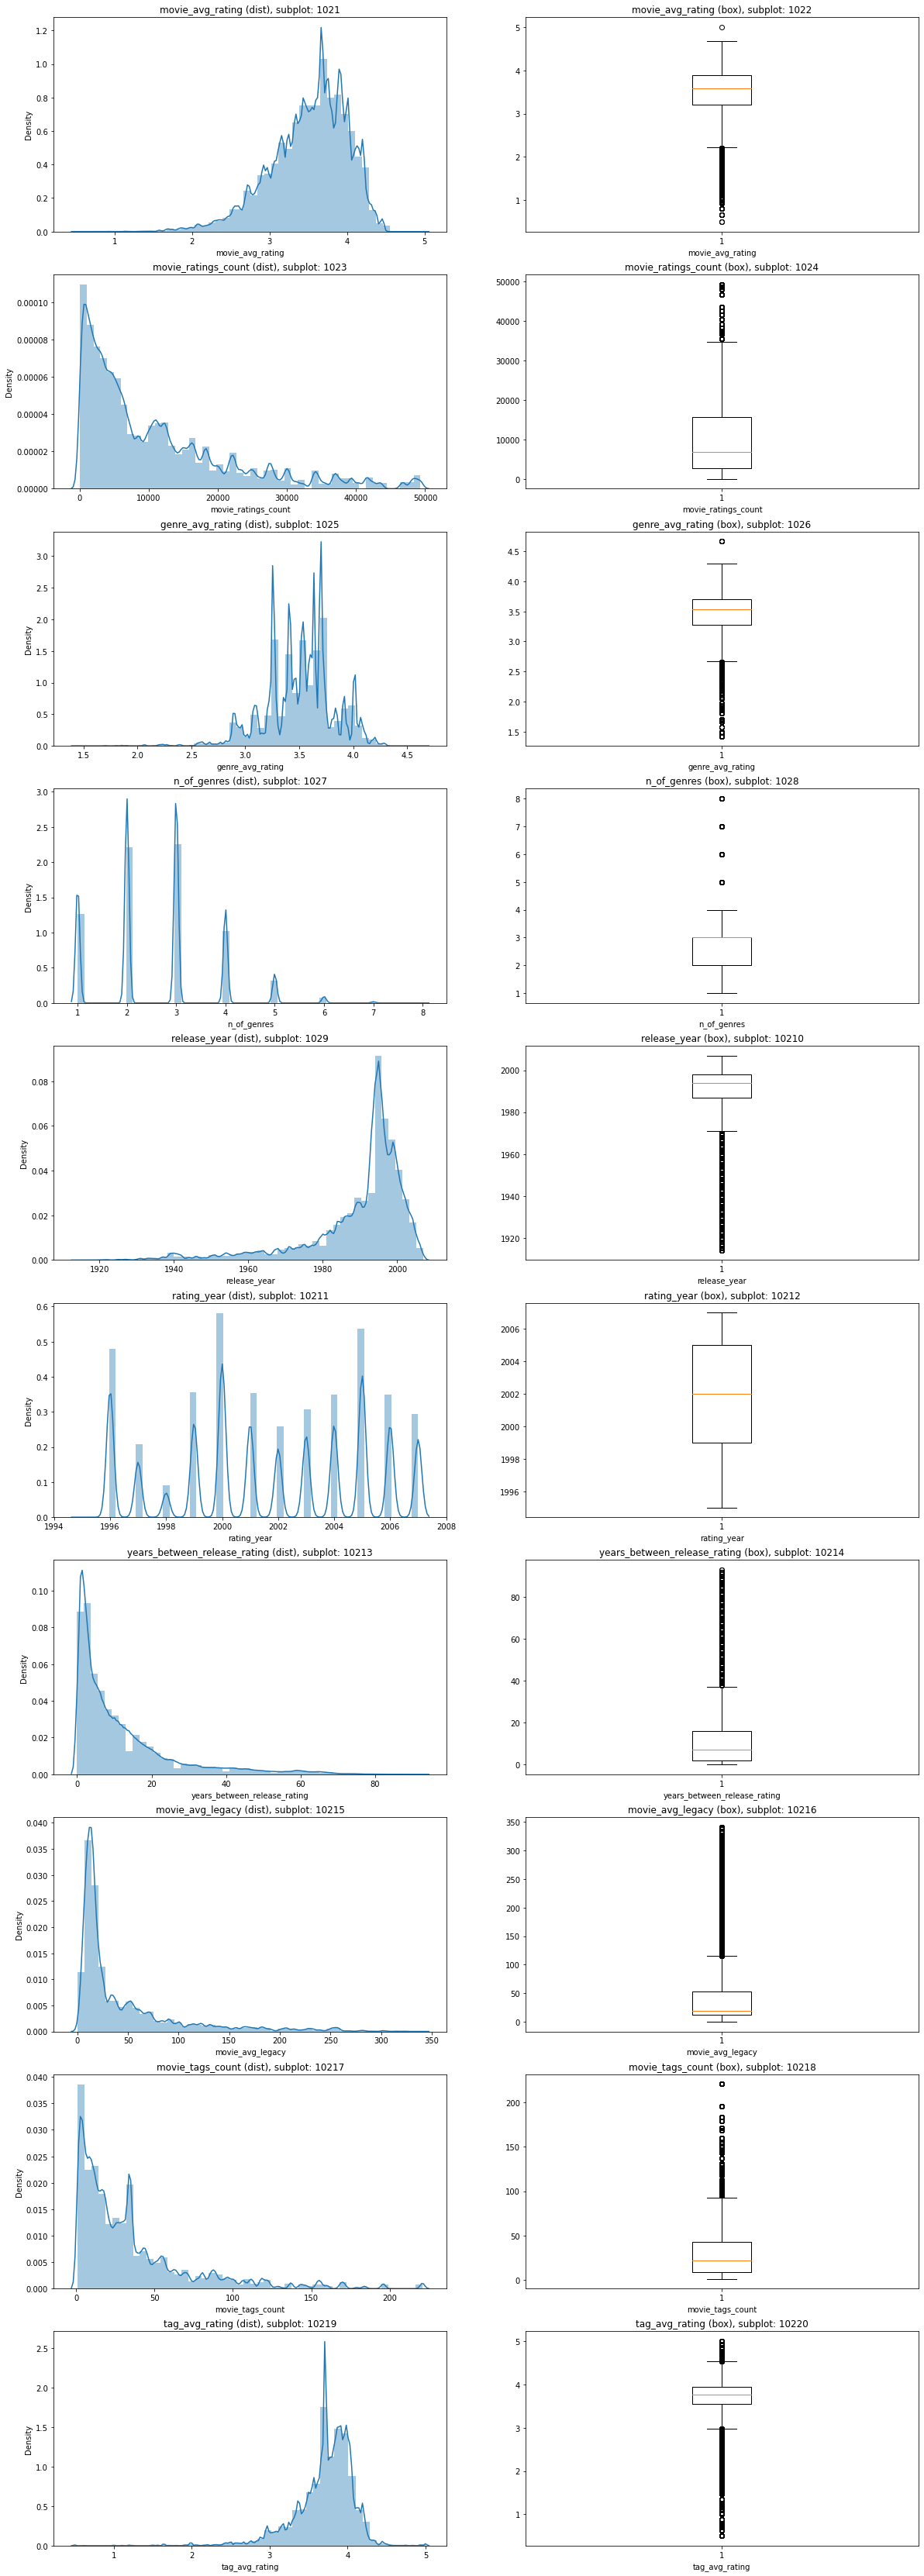

In [99]:
# Plotting training data distributions and boxplots

plot_dist_box(X_train)

In [100]:
# Creating function to compute descriptive statistics

def descriptive_stats(df):
    
    # Computing main descriptive stats
    df_description = pd.DataFrame(df.describe())

    # Computing median
    median = pd.DataFrame(df.median()).T.rename(index={0:'median'})

    # Computing skew
    skew = pd.DataFrame(df.skew()).T.rename(index={0:'skew'})

    # Computing one table with all stats
    df_description = df_description.append([median, skew])
    
    return df_description

In [101]:
# Computing descriptive statistics on the training set

descriptive_stats(X_train)

,movie_avg_rating,movie_ratings_count,genre_avg_rating,n_of_genres,release_year,rating_year,years_between_release_rating,movie_avg_legacy,movie_tags_count,tag_avg_rating
count,1.400018e+07,1.400018e+07,1.400018e+07,1.400018e+07,1.400018e+07,1.400018e+07,1.400018e+07,1.400018e+07,1.400018e+07,1.400018e+07
mean,3.510967e+00,1.086640e+04,3.510967e+00,2.603540e+00,1.989840e+03,2.001666e+03,1.182611e+01,4.317434e+01,3.406313e+01,3.708682e+00
std,4.904171e-01,1.088688e+04,3.105764e-01,1.138975e+00,1.350195e+01,3.424325e+00,1.374461e+01,5.292163e+01,3.695129e+01,3.720668e-01
min,5.000000e-01,1.000000e+00,1.423945e+00,1.000000e+00,1.914000e+03,1.995000e+03,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e-01
25%,3.214722e+00,2.671000e+03,3.280534e+00,2.000000e+00,1.987000e+03,1.999000e+03,2.000000e+00,1.181161e+01,9.000000e+00,3.559256e+00
50%,3.587460e+00,6.783000e+03,3.536288e+00,3.000000e+00,1.994000e+03,2.002000e+03,7.000000e+00,1.928811e+01,2.200000e+01,3.761354e+00
75%,3.882558e+00,1.574400e+04,3.697515e+00,3.000000e+00,1.998000e+03,2.005000e+03,1.600000e+01,5.348577e+01,4.300000e+01,3.948549e+00
max,5.000000e+00,4.932800e+04,4.666667e+00,8.000000e+00,2.007000e+03,2.007000e+03,9.300000e+01,3.413017e+02,2.210000e+02,5.000000e+00
median,3.587460e+00,6.783000e+03,3.536288e+00,3.000000e+00,1.994000e+03,2.002000e+03,7.000000e+00,1.928811e+01,2.200000e+01,3.761354e+00
skew,-7.429744e-01,1.436499e+00,-5.064980e-01,5.070265e-01,-2.009311e+00,-1.456580e-01,1.996702e+00,2.265249e+00,2.060318e+00,-1.777002e+00


In [102]:
# Analyzig correlations between variables

# Computing correlations target and predictor features

corr = df_train.drop(columns=['index', 'userId', 'movieId', 'rating',
                                 'timestamp', 'title', 
                                  'genres', 'usermovieID', 'rating_legacy']).corr()
# Creating orrelations matrix
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Ordering by correlations
corr_df.sort_values(by="correlation",ascending=False, inplace=True)

# Removing self-correlations
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 

# Viewing top 10 possitive correlations

corr_df.head(20)

,feature_1,feature_2,correlation
85,years_between_release_rating,movie_avg_legacy,0.970131
95,movie_avg_legacy,years_between_release_rating,0.970131
101,movie_tags_count,movie_ratings_count,0.725544
31,movie_ratings_count,movie_tags_count,0.725544
14,movie_avg_rating,genre_avg_rating,0.633290
34,genre_avg_rating,movie_avg_rating,0.633290
111,tag_avg_rating,movie_avg_rating,0.556691
21,movie_avg_rating,tag_avg_rating,0.556691
100,movie_tags_count,movie_avg_rating,0.555286
20,movie_avg_rating,movie_tags_count,0.555286


In [103]:
# Viewing top 20 negative correlation

corr_df.tail(20)

,feature_1,feature_2,correlation
66,rating_year,high_rating,-0.068218
6,high_rating,rating_year,-0.068218
90,movie_avg_legacy,movie_ratings_count,-0.093434
30,movie_ratings_count,movie_avg_legacy,-0.093434
55,release_year,high_rating,-0.117186
5,high_rating,release_year,-0.117186
58,release_year,genre_avg_rating,-0.119422
38,genre_avg_rating,release_year,-0.119422
79,years_between_release_rating,movie_ratings_count,-0.126808
29,movie_ratings_count,years_between_release_rating,-0.126808


In [105]:
# Viewing correlations with target variable

corr_df[corr_df['feature_1']== 'high_rating']

,feature_1,feature_2,correlation
1,high_rating,movie_avg_rating,0.384187
3,high_rating,genre_avg_rating,0.247965
9,high_rating,movie_tags_count,0.216180
10,high_rating,tag_avg_rating,0.211527
8,high_rating,movie_avg_legacy,0.152139
2,high_rating,movie_ratings_count,0.143567
7,high_rating,years_between_release_rating,0.098121
4,high_rating,n_of_genres,0.002469
6,high_rating,rating_year,-0.068218
5,high_rating,release_year,-0.117186


## Notes on algorithm selection


- I used a Random Forest Classifier because it is Robust to Outliers, Non-linear and skewed Data. Moreover, it does not require much data preprocesing (no need for scaling or transforming these predictors) and it has straightforward methods to evaluate feature importance. These was very convenient for me since time was limited. 

- Logistic regression was not my choice due to multicolinearity issues (correlation between predictors) and skewness in the predictors data.

- I did not use a KNN Classifier since estimating feature importance would be more more difficult and time consuming.

- I did not use a Support Vector Classifier, regardless of its solid theoretical foundations and it's high classification accuracy in similar problems. The reason was that the training complexity of Support Vector Machines is highly dependent on the data set's size, so given the size of this dataset and the time I had, it was not convenient to use it.

- I did not use boosting (Adaboost, XGboost, etc.) because it builds each tree on previous trees' residuals/errors. Thus, outliers will have much larger residuals than non-outliers, so gradient boosting would focus a disproportionate amount of its attention on those points. Thus, I decided to stick with a simpler Random Forest Classifier.

- The presence of outliers also prevented me for using Principal Component Analysis (PCA) for dimension reduction. PCA is sensitive to outliers and can lead to misleading conclusions.

- Apart from these reasons, I must say that in practice the Random Forest Classifier outperformed both logistic regression and XGboost when, for the sake of experimenting, I tried them (see below). 

## Model evaluation

In [110]:
# Creting function to evaluate models 

def evaluation(list_of_models, X_train, y_train, X_test, y_test):
    #Iterando through each model
    for m in list_of_models:
        
        # Training model
        model = m
        print(f"\n Evaluating {model}: ")
        model.fit(X_train, y_train) 

        # Predicting
        model_class_preds = model.predict(X_test)
        model_prob_preds = model.predict_proba(X_test)
        model_prob_preds_pos = model_prob_preds[:, 1]
        
        #Printing evaluation results
        
        
        print('\n Accuracy =', round(accuracy_score(y_test, model_class_preds), 3)) # Accuracy

        print('\n Precision =', round(precision_score(y_test, model_class_preds), 3)) # Precision

        print('\n Recall =', round(recall_score(y_test, model_class_preds), 3)) # Recall

        print('\n F1 score =', round(f1_score(y_test, model_class_preds), 3)) # F1 score
        
        print('\n ROC AUC =', round(float(roc_auc_score(y_test, model_prob_preds_pos)), 3)) # ROC AUC
        
    return print()

In [108]:
# Evaluating Logistic Regressionand Random Forest Classifier


models_to_evaluate = [DummyClassifier(strategy="most_frequent"), LogisticRegression(max_iter=200), RandomForestClassifier()]

Notes: 

- Evaluating a dummy classifier model, that always predicts the most frequent outcome (high_rating=0) will help me to judge other models' performance.

- I understand that Logistic Regression would require more preprocessing (scaling and transforming predictors), but I am just evaluating it as a simple baseline model to have a benchmark to compare with.

In [111]:
#Evaluating models
evaluation(models_to_evaluate, X_train, y_train, X_test, y_test)


 Evaluating DummyClassifier(strategy='most_frequent'): 

 Accuracy = 0.491

 Precision = 0.491

 Recall = 1.0

 F1 score = 0.659

 ROC AUC = 0.5

 Evaluating LogisticRegression(max_iter=200): 

 Accuracy = 0.549

 Precision = 0.567

 Recall = 0.352

 F1 score = 0.434

 ROC AUC = 0.591

 Evaluating RandomForestClassifier(): 

 Accuracy = 0.63

 Precision = 0.63

 Recall = 0.595

 F1 score = 0.612

 ROC AUC = 0.686



In [139]:
# Trying XGboost Classifier just to check if it outperforms Random Forest in practice

xg_model = XGBClassifier()
print(f"\n Evaluating {xg_model}: ")
xg_model.fit(X_train, y_train) 

# Predicting
xg_model_class_preds = xg_model.predict(X_test)
xg_model_prob_preds = xg_model.predict_proba(X_test)
xg_model_prob_preds_pos = xg_model_prob_preds[:, 1]

#Printing evaluation results


print('\n Accuracy =', round(accuracy_score(y_test, xg_model_class_preds), 3)) # Accuracy

print('\n Precision =', round(precision_score(y_test, xg_model_class_preds), 3)) # Precision

print('\n Recall =', round(recall_score(y_test, xg_model_class_preds), 3)) # Recall

print('\n F1 score =', round(f1_score(y_test, xg_model_class_preds), 3)) # F1 score

print('\n ROC AUC =', round(float(roc_auc_score(y_test, xg_model_prob_preds_pos)), 3)) # ROC AUC


 Evaluating XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None): 


/Users/santiagochiesa/.pyenv/versions/3.8.12/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Accuracy = 0.624

 Precision = 0.639

 Recall = 0.541

 F1 score = 0.586

 ROC AUC = 0.684


Based on the reasons exposed before, I select the Random Forest Classifier.

In [106]:
# Evaluating selected model: Random Forest Classifier

# Instanciating and fitting model

model = RandomForestClassifier()
model.fit(X_train, y_train) 

# Predicting
model_class_preds = model.predict(X_test)
model_prob_preds = model.predict_proba(X_test)
model_prob_preds_pos = model_prob_preds[:, 1]

#Printing evaluation results


print('\n Accuracy =', round(accuracy_score(y_test, model_class_preds), 3)) # Accuracy

print('\n Precision =', round(precision_score(y_test, model_class_preds), 3)) # Precision

print('\n Recall =', round(recall_score(y_test, model_class_preds), 3)) # Recall

print('\n F1 score =', round(f1_score(y_test, model_class_preds), 3)) # F1 score

print('\n ROC AUC =', round(float(roc_auc_score(y_test, model_prob_preds_pos)), 3)) # ROC AUC


 Accuracy = 0.629

 Precision = 0.629

 Recall = 0.597

 F1 score = 0.612

 ROC AUC = 0.686


Notes: 

- Since time is limited and model tuning should not be a priority according to the assignment's instructions, I will stick with the algorithm's default parameters and continue with the rest of the tasks.


- Please refer to the conclusions for notes on model's performance.

# Feature importance

Give an explanation of the importance of each feature, and show us which of the features you created had the highest impact on your model. 

Explain and justify your choice of the importance metric.

Important note: 

Even though your model predicts whether a client will rate as “high” a movie or not, we will not look into your skills building recommendation systems (like collaborative filtering). As we mentioned, we are interested in assessing your feature engineering and modeling skills, using the modeling structure defined above.

## Feature importance analysis

In [163]:
# Evaluating feature importance as the mean and standard deviation of accumulation of the impurity decrease within each tree
pd.DataFrame(pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False))

,0
movie_avg_rating,0.555786
tag_avg_rating,0.088418
genre_avg_rating,0.087409
rating_year,0.079034
movie_tags_count,0.065973
movie_avg_legacy,0.040214
years_between_release_rating,0.030365
movie_ratings_count,0.028943
release_year,0.019452
n_of_genres,0.004406


<BarContainer object of 10 artists>

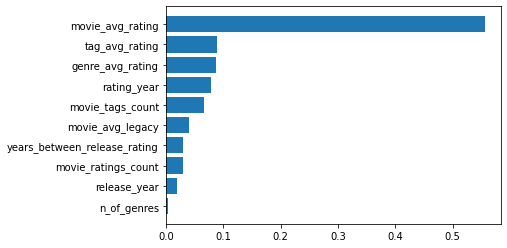

In [168]:
# Plotting results

sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])

In [164]:
# Estimating feature importance based on permutation (long computation)

rf_feature_permutation = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)




/Users/santiagochiesa/.pyenv/versions/3.8.12/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [165]:
forest_importances = pd.Series(rf_feature_permutation.importances_mean, index=X_train.columns)

pd.DataFrame(pd.Series(forest_importances).sort_values(ascending=False))

,0
movie_avg_rating,0.099099
genre_avg_rating,0.006984
movie_avg_legacy,0.004716
movie_tags_count,0.003390
tag_avg_rating,0.003352
movie_ratings_count,0.001830
release_year,0.001241
years_between_release_rating,0.000595
n_of_genres,0.000565
rating_year,0.000000


<BarContainer object of 10 artists>

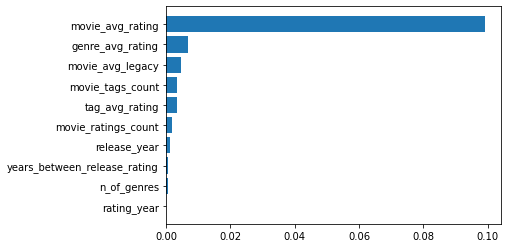

In [169]:
# Plotting results

sorted_idx = forest_importances.argsort()
plt.barh(X_train.columns[sorted_idx], forest_importances[sorted_idx])

## Notes on Feature Importance Analysis

First, I evaluated feature importance as the mean of accumulation of the impurity decrease within each tree. This measures how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature it collects how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance.

This method is easy and fast to implement. However, it has it's limitations. It tends to  numerical features and categorical features with high cardinality (larger number of unique values). Moreover, in the case of correlated features, it may select one of the feature and neglect the importance of the other one.

Thus, I decided to implement feature permutation which, in spite of being more computationally expensive, offers an unbiased outcome. This method randomly shuffles each feature and compute the change in the model's performance. The features which have a greater impact on the performance are the most important ones.

Performance is measured with the mean accuracy metric, which is the default one. The Accuracy meassures the percentage of cases which were correctly classified. This metric makes sense given the nature of the problem (the cost of miss classifying is the same bothways, we are just predicting movie ratings) and the fact that the dataset is well balanced between the two target classes. 

Based on the results of the feature permutation, I can conclude that the movie's average rating had, by far, the highest impact on the model. On a distant second place, we see the movie's genre average rating. On the other hand, the rating's year did not have an impact on the model.

Regarding the rest of the variables, we can see that that they also had an impact. The movie_avg_legacy, movie_tags_count, tag_avg_rating had a greater impact than movie_ratings_count, release_year, years_between_release_rating and n_of_genres.   


# Conclusions

Add some comments summarizing your work. Also, add comments on how you would improve it if further time was given to you.

In this assignment, I worked on the MovieLens 20M Dataset. I will now make a brief summary of the main tasks executed with their conclusions.

## Modeling structure


The objective of the model you create will be to predict whether a client will rate as “high” a movie or not. A binary target variable named "high_rating" was created, taking a value of 1 if the rating was higher than 4, and 0 otherwise.

To avoid data leakage, I was very careful when splitting the train and test set, first ordering the data by timestamp. Then, I divided the dataset into train (70% of the data) and test (30% of the data) sets. I stored the time stamp when the split was made.


## Feature engineering


I created the following features for prediction purposes:

- Movie's average rating
- Movie's ratings count
- Genre's average rating
- Movie's Number of genres
- Movie's Release year
- Rating year
- Difference between movie's release year and rating year
- Movie's average legacy
- Movie's number of tags
- Tag's average rating per movie


To avoid data leakage, features that would have contained information unavailable at the time of prediction were only computed on the train set. Thus, the test set only had past information that was already available when the ratings from the test set were made.


For more details on feature engineering, please refer to section 4.1 Notes on feature engineering.


## Model implementation


After selecting the model's target and predictors, I imputed the null values and conducted some exploratory data analysis. I plotted the distributions of each feature and also plotted boxplots. Then, I computed several descriptive statistics It was clear to me that predictors data was skewed and there were many outliers. 

After gaining knowledge on the dataset, I considered several algorithms that are well suited for classification tasks. These were: Logistic Regression, Suppor Vector Machines Classifier, Random Forest Classifier, KNN Classifier and ensemble methods such as Adaboost Classifier and XGBoost Classifier.
To choose the algorithm I considered the dataset I was working with, the algorithm's properties and limitations, the time I had available and the feature importance task that was ahead of me. 

I decided to use the Random Forest Classifier because it is Robust to Outliers, Non-linear and skewed Data. Moreover, it does not require much data preprocessing (no need for scaling or transforming this model's predictors) and it has straightforward methods to evaluate feature importance. This was very convenient for me since time was very limited.

Apart from these reasons, I must say that in practice the Random Forest Classifier outperformed both a baseline logistic regression and XGboost when, for the sake of experimenting, I evaluated them.

For more details on the reasons behind the algorithm's choice and why I decided not to use other algorithms, please refer to section 5.5 Notes on algorithm selection. 

Since time was limited and model tuning should not be a priority according to the assignment's instructions, I stuck with the algorithm's default parameters.

## Model evaluation

After fitting the model with the train set data, I got the following scores when predicting the test set:

Accuracy = 0.629

Precision = 0.629

Recall = 0.597

F1 score = 0.612

ROC AUC = 0.686


Before commenting on the performance metrics, it is worth mentioning that the dataset is balanced between the two target classes. Approximately, 50.02% of the ratings were below 4 ("high_rating" = 0) and 49.98% of them were equal to or greater than 4 ("high_rating" = 1). 

Also, it is worth considering that, given the nature of the problem at hand, the cost of a wrong prediction was equal on both ways. In other words, classifying a rating as high when in reality it was low would have similar consequences than classifying a rating as low when in reality it was high. We are not dealing with more serious classification problems like diagnosing terminal diseases or classifying safety belts' quality. Hence, Accuracy and ROC AUC were valid metrics to judge the model's performance.

The higher the ROC AUC, the better the performance of the model at distinguishing between the classes. In general, an AUC of 0.5 suggests no discrimination. As a very general rule of thumb (which should be considered with caution), a value between 0.5–0.7 could be acceptable and anything above 0.7 could be good-to-go-model.

Our Random Forest model scored a ROC AUC of 0.686. Now, how good (or bad) is this? 
To answer this question, we look at the "dummy" classifier's performance. This classifier predicts the most frequent outcome. It's score was the following:

 Accuracy = 0.491

 Precision = 0.491

 Recall = 1.0

 F1 score = 0.659

 ROC AUC = 0.5

We can see that implementing Random Forest Classifier improved the Accuracy and ROC AUC significantly. This improvements are good, but not good enough for production. The model should be improved before considering deploying it to production.

In order to improve it, we can evaluate learning curves to check for convergence and signs of overfitting of the training data. Moreover, the parameters of the algorithm should be tunned to improve the model's performance. I could tune the depth of the decision trees. Deeper trees are often more overfitted to the training data, but also less correlated, which in turn may improve the performance of the ensemble. Also, the number of decision trees in the ensemble could be tunned. Often, this is increased until no further improvement is seen. Model tunning could be done through a Grid Search or Random Search. Since time was limited and the assignment instructions asked me not to spend much time on model tunning, I did not carry on with this tasks.


## Feature importance

To analyze the importance of each feature, I used two different methods. 

First, I used Sklearn's Random Forest Classifier's feature importance method. Results were displayed and plotted, showing that the movie's average rating was the most important feature.  Since this method has its bias, I decided to also use feature permutation.

Based on the results of the feature permutation, I can conclude that the movie's average rating had, by far, the highest impact on the model. On a distant second place, we see the movie's genre average rating. On the other hand, the rating's year did not have an impact on the model.

Regarding the rest of the engineered features, we can see that that they had a minor impact, way lower that the movie's average rating. The movie_avg_legacy, movie_tags_count, tag_avg_rating had a greater impact than movie_ratings_count, release_year, years_between_release_rating and n_of_genres.

# Sugested next steps

To finalize, I will comment on the room for improvement that my work has left. 
If I could allocate more time to this assignment, I would try the following:

- Conduct some research and literature review to understand what drives users' movie ratings. Acquiring more domain knowledge would probably help me to come up with more valuable features.


- Seek for external data sources that could help me create more valuable features. This dataset has id's linking to Imdb and Tmdb databases. Due to time limitations and data leakage concerns, I could not use them to enhance my feature engineering. However, I would definitely do some research on how to integrate them and create more features with their valuable information, while avoiding data leakage.


- Explore engineering features from the user's perspective, since most of my engineered features only capture movie-related characteristics.


- Improve exploratory data analysis, to gain a better grasp on the dataset. 


- Try more algorithms and data processing methods. Time limitations did not allow me to spend much time processing the dataset, which left some algorithms out of the discussion. Cross-validating the models is a great practice that was omitted in this exercise, but I would implement if I had more time. Pipelines could be created, to assess the performance of different processing methods and algorithms. Moreover, data preprocessing could have helped me to reduce the model's training time.


- Tune model's parameters to improve performance. Due to time limitations, I stuck with Random Forest's default hyper-parameters. I could tune the depth of the decision trees. Deeper trees are often more overfitted to the training data, but also less correlated, which in turn may improve the performance of the ensemble. Also, the number of decision trees in the ensemble could be tunned. Often, this is increased until no further improvement is seen. I would also tune other algorithm's I if they prove to have good performance. 


- Improve code efficiency and make considerations on computation time. 


- Create a pipeline that automates these tasks for production deployment.